In [1]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
import xgboost as xgb
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt

In [2]:



img_height, img_width = 224, 224
batch_size = 32

train_dir = 'D:/FCI/CV/سكاشن/Dataset/train'
test_dir = 'D:/FCI/CV/سكاشن/Dataset/test'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True,
)

Found 3208 images belonging to 2 classes.
Found 708 images belonging to 2 classes.


In [3]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width,img_height,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


C:\Users\elnour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:


def extract_features(generator, max_steps=None):
    features = []
    labels = []
    steps = max_steps if max_steps else len(generator)
    for _ in range(steps):
        X, y = next(generator)
        batch_features = model.predict(X)
        features.append(batch_features)
        labels.append(y)
    return np.concatenate(features), np.concatenate(labels)


def extract_features_single_image(x,y):
    features = []
    labels = []
    batch_features = model.predict(x)
    features.append(batch_features)
    labels.append(y)
    return np.concatenate(features), np.concatenate(labels)



In [5]:

max_steps = None 

In [6]:
X_train, Y_train = extract_features(train_generator, max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [7]:

X_test, Y_test = extract_features(test_generator,max_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


In [8]:

#optmizer take alot of time

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


# xgb_classifier = xgb.XGBClassifier()

# param_grid = {
#     'iterations': [100,200,300,400,500],
#     'learning_rate': [0.1,0.3,0.5,1],
#     'depth': [1,2,3],
    
    
    
# }

 
# grid_search = HalvingGridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5,n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, Y_train)


# print("Best parameters found: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_

In [9]:

xgb_classifier = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=6,
    eval_metric='mlogloss')
xgb_classifier.fit(X_train, Y_train)



D:\FCI\CV\سكاشن\CV-TASKS\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:

y_pred = xgb_classifier.predict(X_test)

score =accuracy_score(Y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.7189265536723164


In [11]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.57      0.66       345
         1.0       0.68      0.86      0.76       363

    accuracy                           0.72       708
   macro avg       0.74      0.72      0.71       708
weighted avg       0.73      0.72      0.71       708



In [12]:
joblib.dump(xgb_classifier, 'xgb_classifier.pkl')

['xgb_classifier.pkl']

In [13]:
xgb_classifier_loaded = joblib.load('xgb_classifier.pkl')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


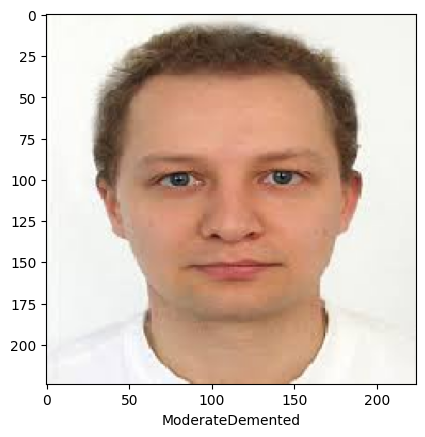

In [14]:

random_image, random_label = next(test_generator)


x ,y = extract_features_single_image(random_image,random_label)

prediction = xgb_classifier_loaded.predict(x)

class_labels = {0: 'MildDemented', 1: 'ModerateDemented',2: 'NonDemented',3:'VeryMildDemented'}


result = class_labels[prediction[0]]

plt.imshow(random_image[0]) 
plt.xlabel(result)
plt.show()
